In [40]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb



expon = lambda n: stat.gamma(n, loc = 1)
my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [18]:
expectation = m.pi/4
varience = expectation * (1 - expectation)
stdev = m.sqrt(varience)


$\mathsf{P} 
\left(
\left| \dfrac{S_N}{N} - \pi / 4 \right|
\leqslant 
\Phi^{-1} \left(\dfrac{1 + \alpha}{2}\right) 
\cdot
\dfrac{\sigma}{\sqrt{N}}
\right)
\approx
\alpha
$

$\alpha = 0.998$, 
$\quad \Phi^{-1} \left(\dfrac{1 + 0.998}{2}\right) 
\cdot
\dfrac{\sigma}{\sqrt{N}} = 0.0005$ 

$N = \left( \Phi^{-1} \left(\dfrac{1 + 0.998}{2}\right) 
\cdot
\dfrac{\sigma}{0.0005} \right)^2$


In [66]:
N = (my_norm(0, 1).ppf((1 + 0.998) / 2) * stdev * 2000) ** 2
print(N)

6438216.311144747


In [39]:
def len(x, y):
    return m.sqrt((x - 0.5)**2 + (y - 0.5)**2)

i = 0; counter = 0; samplesize = 1000; new_N = (N // samplesize) * samplesize; print("new N =", new_N)
while (i < N):
    x_coord = stat.uniform.rvs(size = samplesize)
    y_coord = stat.uniform.rvs(size = samplesize)
    
    for j in range(samplesize):
        if (len(x_coord[j], y_coord[j]) <= 0.5):
            counter += 1
    
    i += samplesize;
    
print("pi ~= ", 4 * counter / new_N)
    

new N = 6438000.0
pi ~=  3.1413780677228953


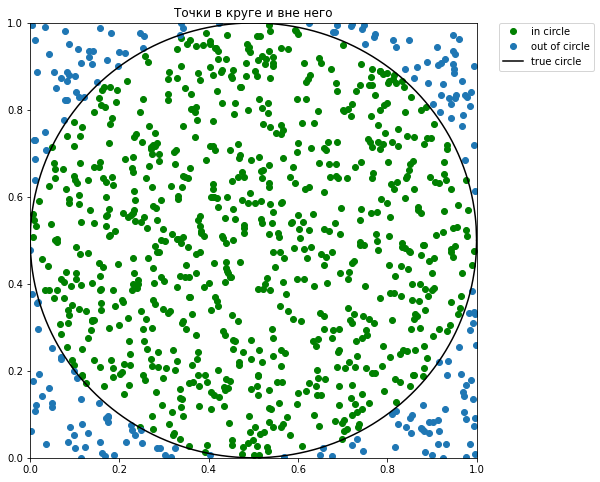

In [87]:
samplesize = 1000
x_sample = stat.uniform.rvs(size = samplesize)
y_sample = stat.uniform.rvs(size = samplesize)

x_inside = []; y_inside = []; x_outside = []; y_outside = [];

for i in range (samplesize):
    if (len(x_sample[i], y_sample[i]) <= 0.5):
        x_inside.append(x_sample[i])
        y_inside.append(y_sample[i])
    else:
        x_outside.append(x_sample[i])
        y_outside.append(y_sample[i])

x_beauty = np.linspace(0, 1, 1000)
y_beauty = [0.5 + m.sqrt(0.25 - (element - 0.5)**2) for element in x_beauty]

plt.figure(figsize=(8, 8))
plt.plot(x_inside, y_inside, 'o', color = 'green', label = 'in circle')
plt.plot(x_outside, y_outside, 'o', label = 'out of circle')
plt.plot(x_beauty, y_beauty, color = 'k', label = 'true circle')
plt.plot(x_beauty, [1-elem for elem in y_beauty], color = 'k')
plt.xscale("linear")
plt.yscale("linear")
plt.axis([0, 1, 0, 1])
#plt.legend(loc = 'upper left')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Точки в круге и вне него")
plt.show()

In [ ]:
#integrand = lambda x, n, a1, b1, c1, d1: c_n_total_PDF(x, n, a1, b1, c1, d1) 
#print("Integral = ", quad(integrand, -np.inf, np.inf, args = (100, a, b, c, d)))

In [16]:
'''
integrand = lambda x, y: m.sqrt((x - 0.5) ** 2 + (y - 0.5) ** 2)
expectation = dblquad(integrand, 0, 1, lambda y: 0, lambda y: 1)[0]
print("Expectation = ", expectation)

#integrand = lambda y: 0.5 * (m.sqrt(1 + y * y) + y * y * m.log((1 + m.sqrt(1 + y * y)) / y))
#print("Expectation = ", quad(integrand, 0, 1)[0])
#сошлось

integrand = lambda x, y: (m.sqrt((x - 0.5) ** 2 + (y - 0.5) ** 2) - expectation) ** 2
varience = dblquad(integrand, 0, 1, lambda y: 0, lambda y: 1)[0]
print("Varience = ", varience) 
'''
a = 5;